In [1]:
library(GLMsData)
data(lungcap)

In [2]:
lungcap$Smoke <- factor(lungcap$Smoke,
levels=c(0, 1),
labels=c("Non-smoker","Smoker"))

In [3]:
LC.lm <- lm( FEV ~ Ht + Gender + Smoke, data=lungcap)

In [4]:
summary(LC.lm)


Call:
lm(formula = FEV ~ Ht + Gender + Smoke, data = lungcap)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66819 -0.25393  0.00088  0.23749  2.07863 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.362078   0.186553 -28.743  < 2e-16 ***
Ht           0.129693   0.003106  41.756  < 2e-16 ***
GenderM      0.127643   0.034093   3.744 0.000197 ***
SmokeSmoker  0.034138   0.058581   0.583 0.560265    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4268 on 650 degrees of freedom
Multiple R-squared:  0.7589,	Adjusted R-squared:  0.7577 
F-statistic: 681.9 on 3 and 650 DF,  p-value: < 2.2e-16


In [5]:
resid.raw <- resid( LC.lm )

In [6]:
resid.std <- rstandard( LC.lm )

In [7]:
c( Raw=var(resid.raw), Standardized=var(resid.std) )

Raw Standardized 
   0.1812849    1.0027232

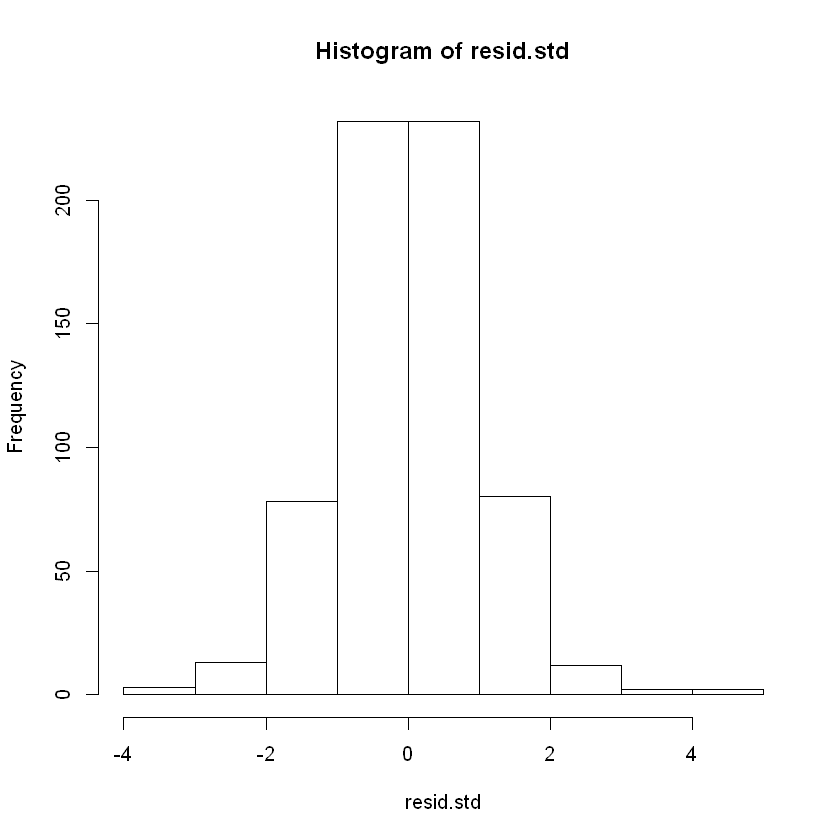

In [8]:
hist(resid.std)

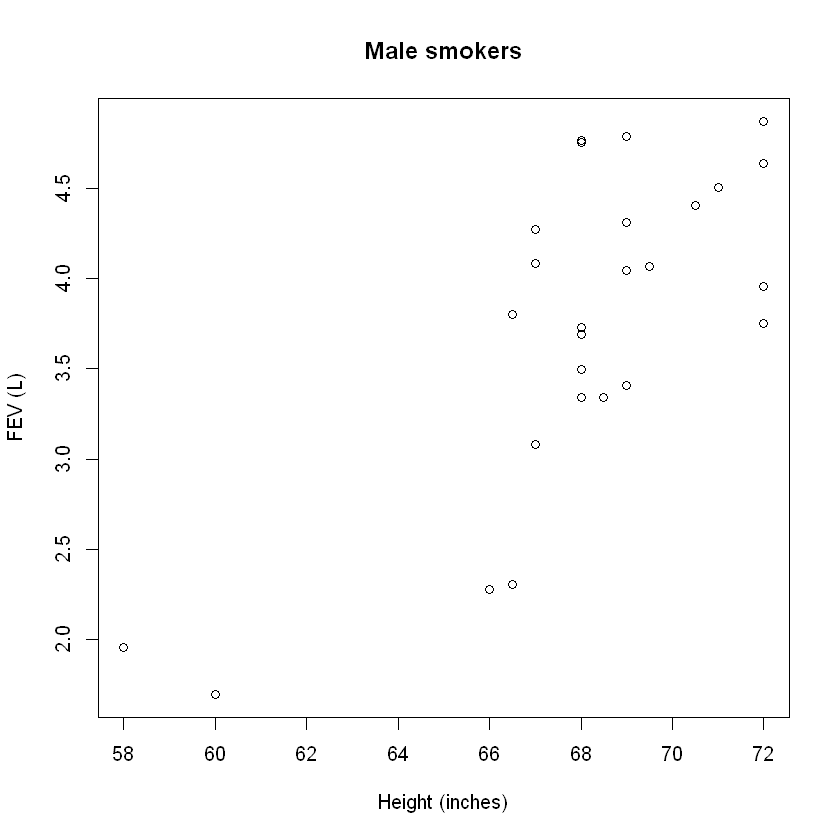

In [9]:
plot( FEV ~ Ht, main="Male smokers",
data=subset( lungcap, Gender=="M" & Smoke=="Smoker"),
# Only male smokers las=1, xlim=c(55, 75), ylim=c(0, 5),
xlab="Height (inches)", ylab="FEV (L)" )

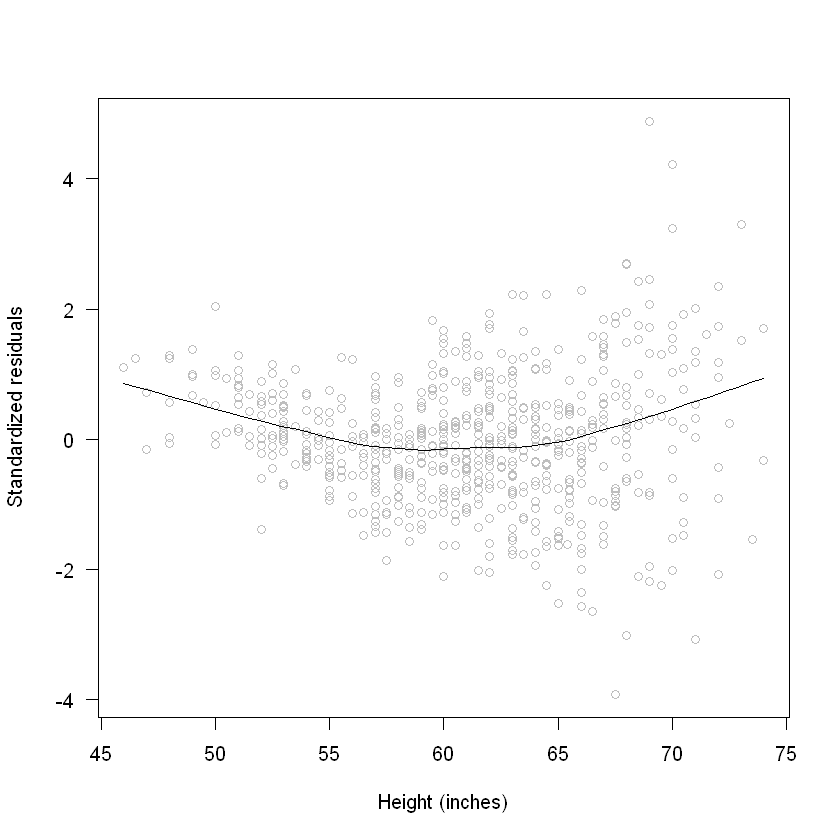

In [11]:
scatter.smooth( rstandard( LC.lm ) ~ lungcap$Ht, col="grey",
las=1, ylab="Standardized residuals", xlab="Height (inches)")

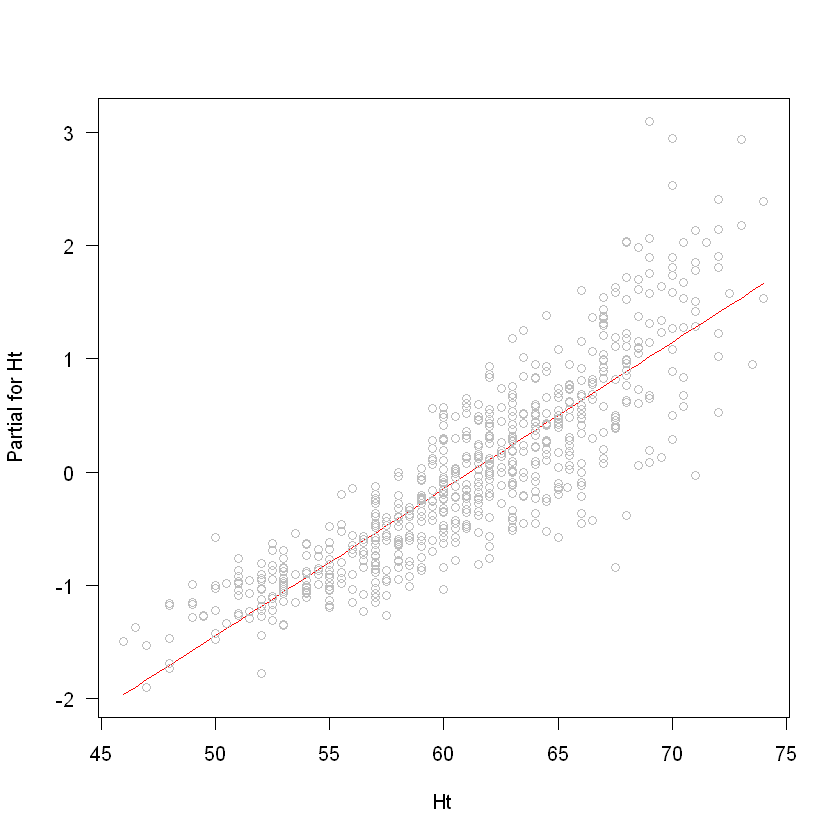

In [12]:
termplot( LC.lm, partial.resid=TRUE, terms="Ht", las=1)

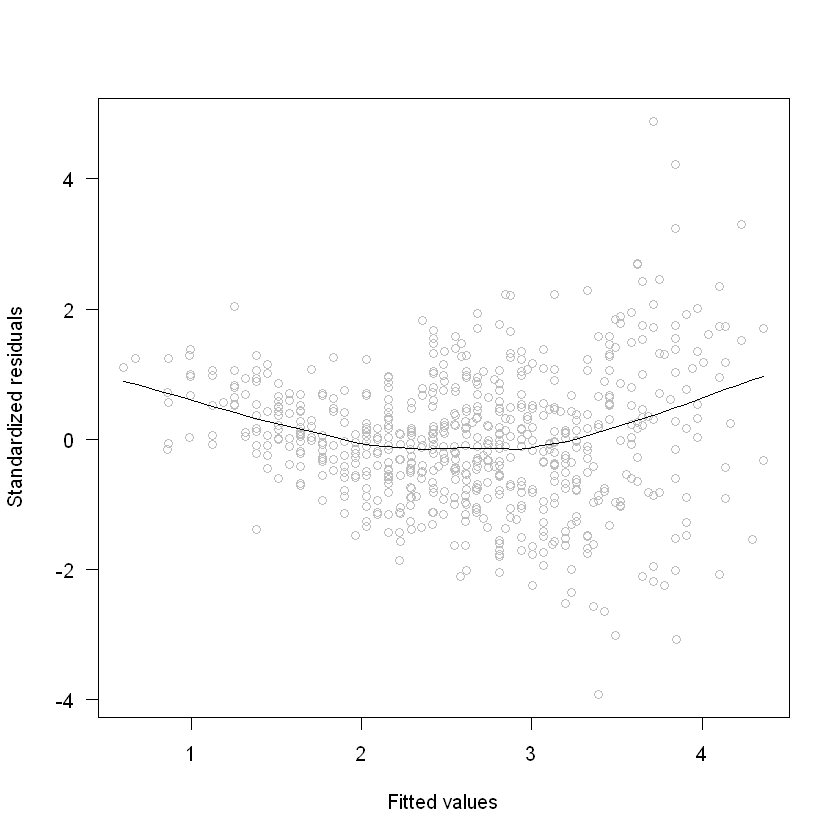

In [13]:
scatter.smooth( rstandard( LC.lm ) ~ fitted( LC.lm ), col="grey",
las=1, ylab="Standardized residuals", xlab="Fitted values")

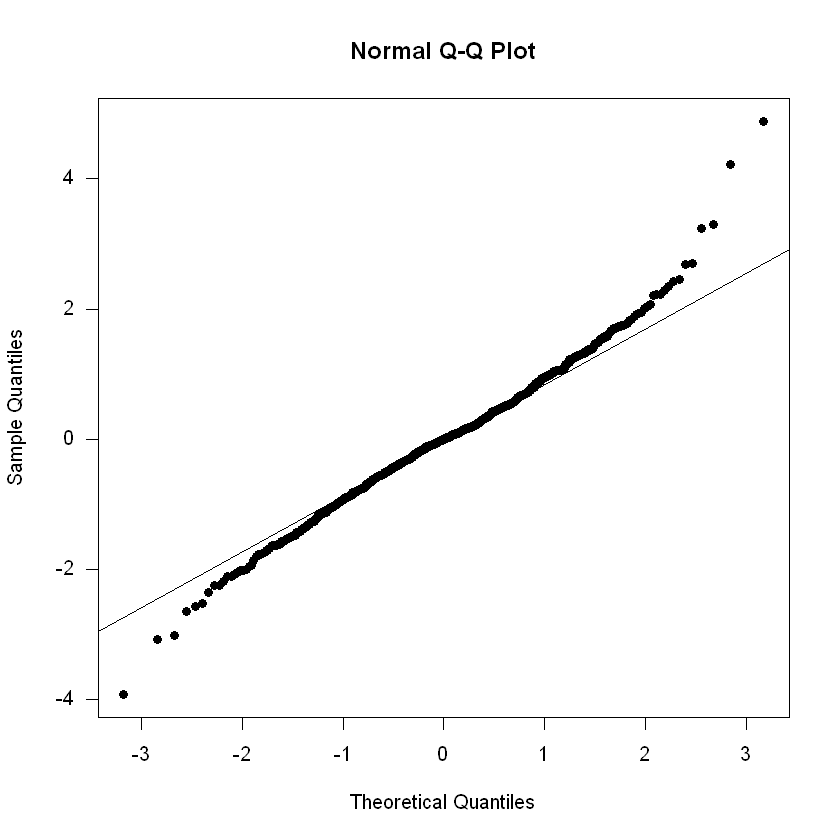

In [16]:
qqnorm( rstandard( LC.lm ), las=1, pch=19)
qqline( rstandard( LC.lm ) )

In [19]:
library(MASS)

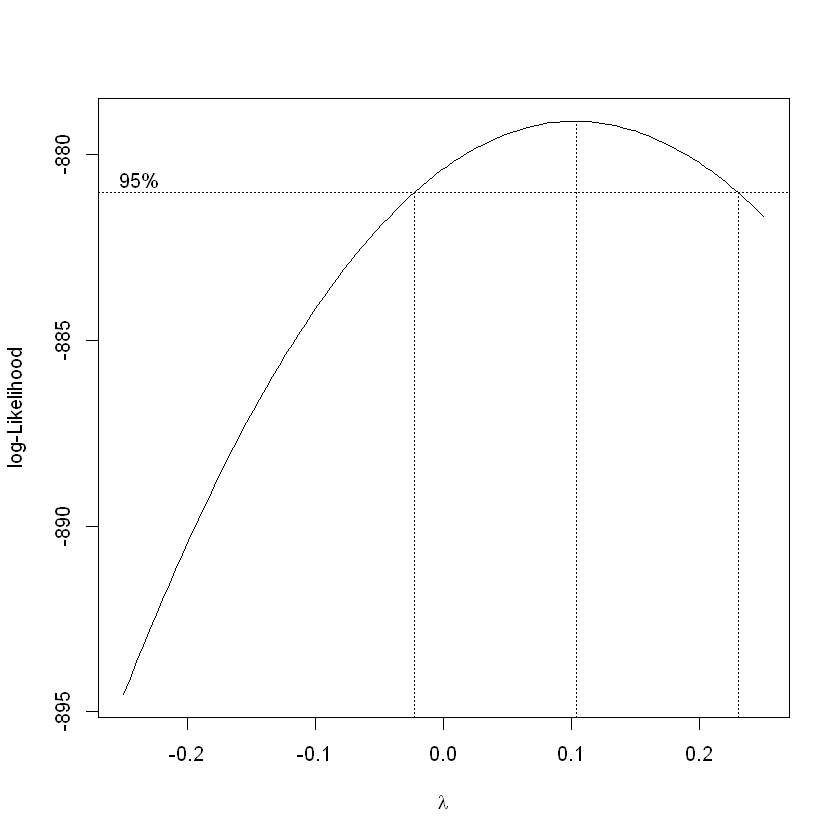

In [20]:
boxcox( FEV ~ Ht + Gender + Smoke,
lambda=seq(-0.25, 0.25, length=11), data=lungcap)

In [23]:
lm.box.cox <- lm(I((FEV^(0.1) - 1)/0.1) ~ Ht + Gender + Smoke, data=lungcap)

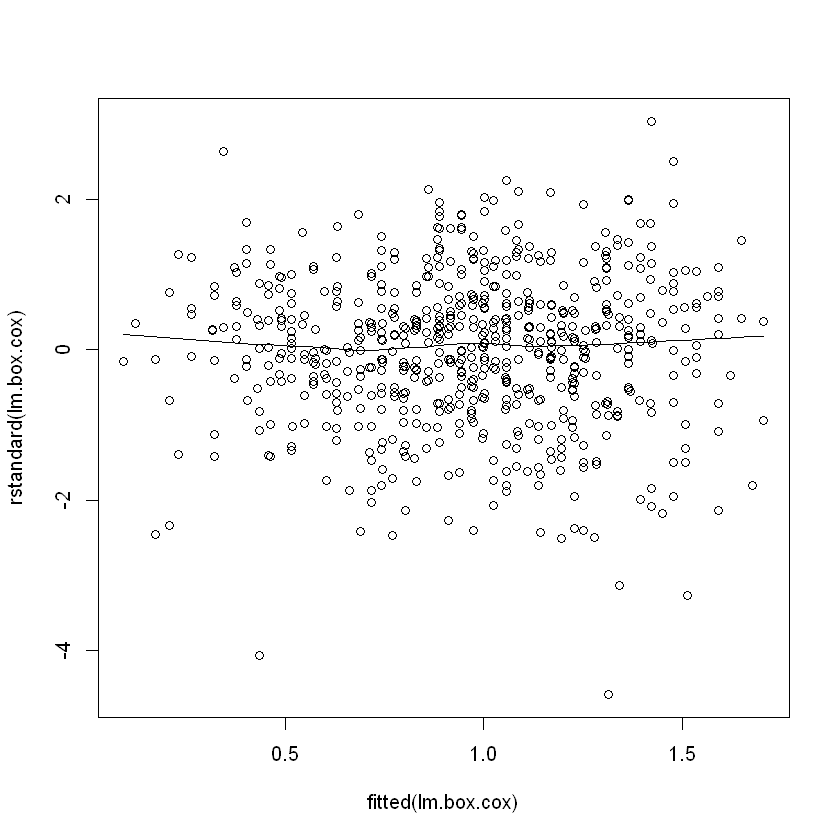

In [24]:
scatter.smooth(rstandard(lm.box.cox) ~ fitted(lm.box.cox))

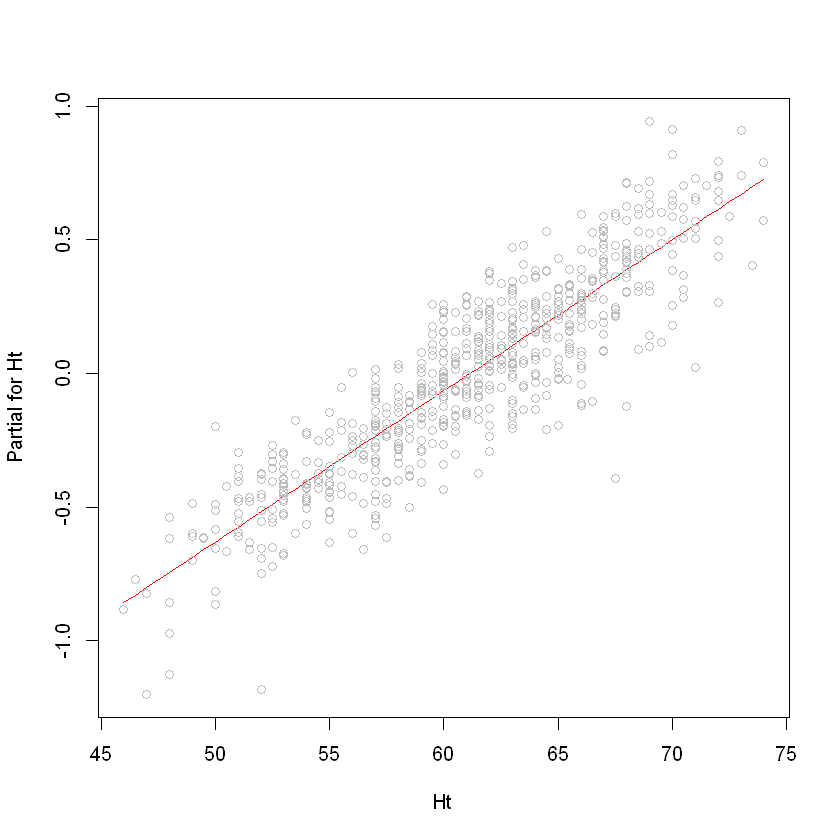

In [25]:
termplot(lm.box.cox, partial.resid = TRUE, terms = "Ht")

In [28]:
shapiro.test(rstandard(lm.box.cox))


	Shapiro-Wilk normality test

data:  rstandard(lm.box.cox)
W = 0.98692, p-value = 1.364e-05
